In [ ]:
Gan :it has two nn


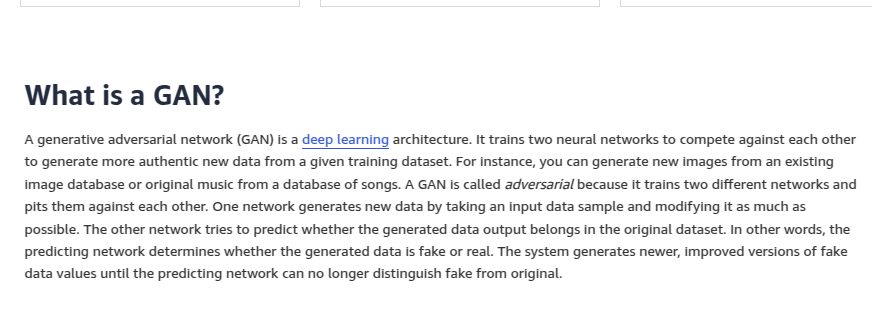

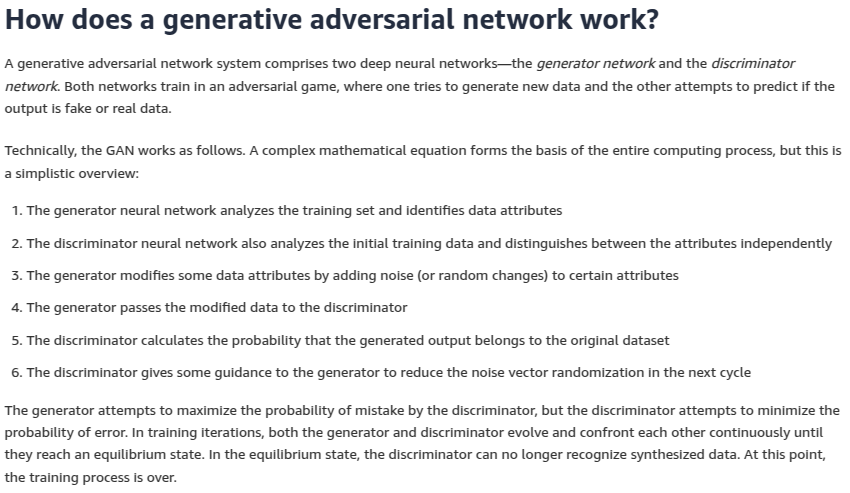

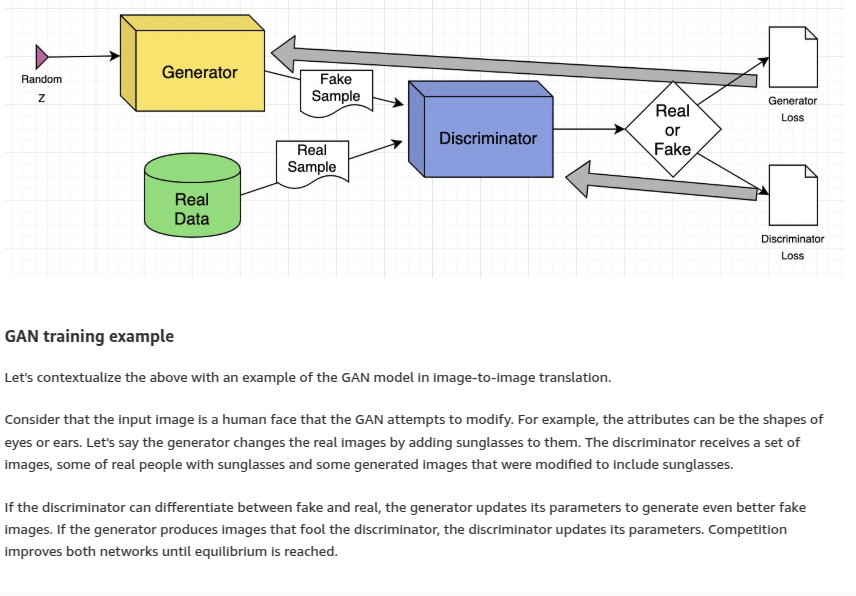

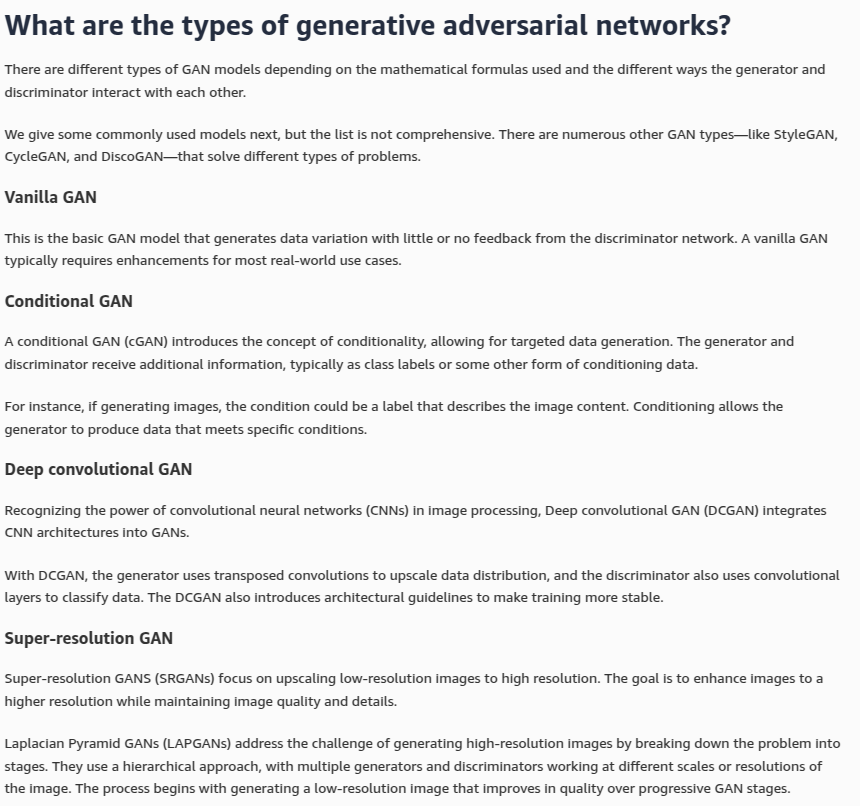

In [ ]:
import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, z_dim=100):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 4*4*512),  # Expand from 100 → 4x4x512
            nn.ReLU(),
            nn.Unflatten(1, (512, 4, 4)),  # Reshape to (512, 4, 4)
            
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()  # Output 64x64 RGB image
        )

    def forward(self, z):
        return self.model(z)

# Create a generator and generate an image from a random 100D vector
generator = Generator()
z = torch.randn(1, 100)  # Random noise input
fake_image = generator(z.view(1, 100, 1, 1))  # Reshape input to match the model
print(fake_image.shape)  # Output: torch.Size([1, 3, 64, 64])
